In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
from sklearn import preprocessing
def retrieve_iMDB_links(pages, start=1):
    
    links = []
    for i in range(pages):
        url = f"https://www.imdb.com/search/title/?release_date=2018-01-01,2020-12-31&view=simple&count=100"
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page)
        find_urls = soup.find_all(class_="lister-item-index unbold text-primary")
        link_list = [i.findNext().findChildren()[0]["href"] for i in find_urls]
        links.extend(link_list)
        start += 10
    return links


In [2]:
dataframe = pd.DataFrame(pd.read_csv('IMDb_movies.csv'))

E:\Program Files (x86)\miniconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print(dataframe)

      imdb_title_id                           title  \
0         tt0000009                      Miss Jerry   
1         tt0000574     The Story of the Kelly Gang   
2         tt0001892                  Den sorte drøm   
3         tt0002101                       Cleopatra   
4         tt0002130                       L'Inferno   
...             ...                             ...   
85850     tt9908390                         Le lion   
85851     tt9911196  De Beentjes van Sint-Hildegard   
85852     tt9911774       Padmavyuhathile Abhimanyu   
85853     tt9914286               Sokagin Çocuklari   
85854     tt9914942      La vida sense la Sara Amat   

                       original_title  year date_published  \
0                          Miss Jerry  1894     1894-10-09   
1         The Story of the Kelly Gang  1906     26/12/1906   
2                      Den sorte drøm  1911     19/08/1911   
3                           Cleopatra  1912     13/11/1912   
4                           L

In [4]:
iMDB_dataframe = dataframe.copy()


In [5]:
iMDB_dataframe.drop_duplicates(subset=['title'],inplace=True)

In [6]:
iMDB_dataframe.set_index('title',inplace=True)

In [7]:
iMDB_dataframe_drop = iMDB_dataframe

In [8]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
imdb_title_id            85855 non-null object
title                    85855 non-null object
original_title           85855 non-null object
year                     85855 non-null object
date_published           85855 non-null object
genre                    85855 non-null object
duration                 85855 non-null int64
country                  85791 non-null object
language                 85022 non-null object
director                 85768 non-null object
writer                   84283 non-null object
production_company       81400 non-null object
actors                   85786 non-null object
description              83740 non-null object
avg_vote                 85855 non-null float64
votes                    85855 non-null int64
budget                   23710 non-null object
usa_gross_income         15326 non-null object
worlwide_gross_income    31016 non-null object

In [9]:
iMDB_drop = iMDB_dataframe_drop[iMDB_dataframe_drop['avg_vote'].notna()]

In [10]:
iMDB_drop = iMDB_drop[iMDB_drop['duration'].notna()]

In [11]:
X, y = iMDB_drop[['duration']], iMDB_drop['avg_vote']

In [12]:
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.4f}'.format(lr.score(X, y)))

R-squared: 0.0579


In [13]:

Genre_dataframe = pd.get_dummies(iMDB_drop['genre'])
Genre_dummies = pd.concat([iMDB_drop, Genre_dataframe], axis=1)


In [14]:
genre_dummies = pd.concat([iMDB_drop, Genre_dataframe], axis=1)

In [15]:
X, y = genre_dummies[['duration',
        'Music', 'Sci-Fi', 'Mystery', 'Sport', 'Family', 'War', 'Western', 'Musical', 'Documentary', 'Action', 'Fantasy', 'Horror', 'Biography', 'Drama', 'Comedy', 'Thriller', 'Animation', 'Crime', 'Adventure', 'History', 'Romance']], genre_dummies['avg_vote']
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.4f}'.format(lr.score(X, y)))

R-squared: 0.1274


In [16]:
Genre_dataframe = pd.Series(Genre_dummies['genre'])

In [17]:
Genre_dataframe = pd.get_dummies(Genre_dataframe.apply(pd.Series).stack()).sum(level=0)

In [18]:
dataframe_genres = pd.concat([genre_dummies, iMDB_drop], axis=1)


In [19]:
X, y = dataframe_genres[['duration',
        'Music', 'Sci-Fi', 'Mystery', 'Sport', 'Family', 'War', 'Western', 'Musical', 'Documentary', 'Action', 'Fantasy', 'Horror', 'Biography', 'Drama', 'Comedy', 'Thriller', 'Animation', 'Crime', 'Adventure', 'History', 'Romance']], dataframe_genres['avg_vote']
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.4f}'.format(lr.score(X, y)))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=10)

R-squared: 0.1274


E:\Program Files (x86)\miniconda\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "


In [20]:
from sklearn.model_selection import train_test_split
X, y = dataframe_genres[['duration',
        'Music', 'Sci-Fi', 'Mystery', 'Sport', 'Family', 'War', 'Western', 'Musical', 'Documentary', 'Action', 'Fantasy', 'Horror', 'Biography', 'Drama', 'Comedy', 'Thriller', 'Animation', 'Crime', 'Adventure', 'History', 'Romance']], dataframe_genres['avg_vote']
X, X_test, y, y_test = train_test_split(X, y, test_size=.1, random_state=10)

In [21]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X, y = np.array(X), np.array(y) 
lr = LinearRegression()

In [25]:
kf = KFold(n_splits=10, shuffle=True, random_state = 1)
cv_lr_r2s, cv_lr_reg_r2s = [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #Linear Regression
    lr = LinearRegression()
    lr_reg = Ridge(alpha=1)

    lr.fit(X_train, y_train)
    cv_lr_r2s.append(lr.score(X_val, y_val))
    
    #Ridge
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lr_reg.fit(X_train_scaled, y_train)
    cv_lr_reg_r2s.append(lr_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lr_r2s)
print('Ridge scores: ', cv_lr_reg_r2s, '\n')

print(f'Simple mean cv R-squared: {np.mean(cv_lr_r2s):.3f} +- {np.std(cv_lr_r2s):.3f}')
print(f'Ridge mean cv R-squared: {np.mean(cv_lr_reg_r2s):.3f} +- {np.std(cv_lr_reg_r2s):.3f}')

E:\Program Files (x86)\miniconda\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "
E:\Program Files (x86)\miniconda\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses 

Simple regression scores:  [0.12538526886523582, 0.1460643230273696, 0.12066558115072257, 0.13419585308766724, 0.12455227208390073, 0.1260202054544145, 0.12865937018483098, 0.12712872076494774, 0.12872049076745695, 0.12445501600252373]
Ridge scores:  [0.12538539572059038, 0.14606421629082034, 0.12047223118627383, 0.13419587958883472, 0.12455244541145927, 0.1260201783311189, 0.12865936688599644, 0.12712861022507294, 0.12872045760629425, 0.12445503734567853] 

Simple mean cv R-squared: 0.129 +- 0.007
Ridge mean cv R-squared: 0.129 +- 0.007


E:\Program Files (x86)\miniconda\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  warnings.warn("The default value of multioutput (not exposed in "
E:\Program Files (x86)\miniconda\lib\site-packages\sklearn\base.py:426: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses 

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
lr_reg.fit(X_train_scaled, y_train);

In [28]:
test_set_pred = lr_reg.predict(X_test_scaled)

In [29]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print('MAE: {:.4f}'.format(mae(y_test, test_set_pred)))

TypeError: unsupported format string passed to Series.__format__

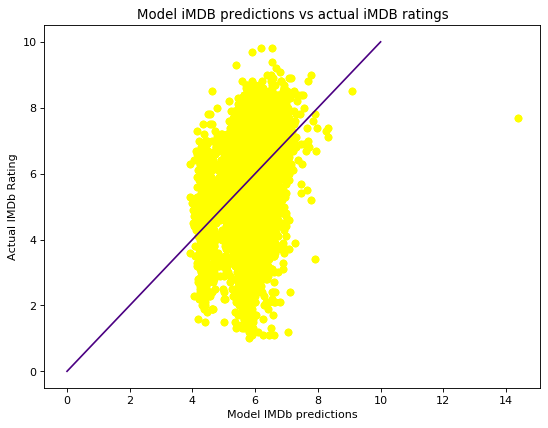

In [27]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(test_set_pred, y_test, alpha=1, color='Yellow' )
plt.plot(np.linspace(0,10), np.linspace(0,10), color='Indigo')

plt.title('Model iMDB predictions vs actual iMDB ratings')
plt.xlabel('Model IMDb predictions')
plt.ylabel('Actual IMDb Rating');

In [33]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(256, activation='relu',input_shape=(23,)),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

2.3.0


In [34]:
print(X.shape)

(59107, 23)


In [32]:
NN = build_and_compile_model()
NN.fit(X, y, validation_data=(X_val, y_val), epochs=5, batch_size=1)


Epoch 1/5
59107/59107 [==============================] - 23s 393us/step - loss: 0.9528 - val_loss: 0.9153
Epoch 2/5
59107/59107 [==============================] - 23s 391us/step - loss: 0.9009 - val_loss: 0.9512
Epoch 3/5
59107/59107 [==============================] - 24s 399us/step - loss: 0.8958 - val_loss: 0.9091
Epoch 4/5
59107/59107 [==============================] - 25s 419us/step - loss: 0.8924 - val_loss: 0.9086
Epoch 5/5
59107/59107 [==============================] - 24s 399us/step - loss: 0.8896 - val_loss: 0.9029
